# **Pacual Capstone Group 4 Notebook - Route Optimization**

Group members: *Abdullah Alshaarawi, James Alarde, Hiromitsu Fujiyama, Sanjo Joy, Thomas Arturo Renwick Morales*

This notebook is organized in the following sections:

* [Part 0 - Importing the Necessary Libraries](#0)

* [Part 1 - Data Loading](#1)

* [Part 2 - Preliminary Data Analysis & Cleaning/Wrangling](#2)
  * [Part 2.1 - Preliminary Analysis of the Dataset](#2.1)
  * [Part 2.2 - Converting Column Names to Pythonic Snake-Case](#2.2)
  * [Part 2.3 - Dealing with Duplicates](#2.3)
  * [Part 2.4 - Ensuring Correct Data Types](#2.4)
  * [Part 2.5 - Dealing with Null/Missing Values](#2.5)
  * [Part 2.6 - Final Checks](#2.6)

* [Part 3 - Business Logic-Based Transformations](#3)
  * [Part 3.1 - Aligning `number_of_orders` to Business Definition of Delivery](#3.1)
  * [Part 3.2 - Exploring and Handling Non-Positive `income` Values](#3.2)
  * [Part 3.3 - Exploring and Handling Non-Positive `volume` Values](#3.3)
  * [Part 3.4 - Validating Dataset Readiness for Aggregation](#3.4)

* [Part 4 - One Row per Client: Data Aggregation](#4)

* [Part 5 - Exploratory Data Analysis](#4)

---

<a id='0'></a>
## Part 0 - Importing the Necessary Libraries

First, we imported the libraries which were necessary for our analysis.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import numpy as np
import joblib

# Displaying only 2 decimal points for visual purposes
pd.set_option('display.float_format', '{:.2f}'.format) 

In [33]:
#To reset to default display option if needed later on:
## pd.reset_option('display.float_format')

<a id='1'></a>
# Part 1 - Data Loading

Then, we proceeded to load the dataset.

In [34]:
df = pd.read_csv('dataset/Orders_Master_Data(in).csv')

<a id='2'></a>
# Part 2 - Preliminary Data Analysis & Cleaning/Wrangling

<a id='2.1'></a>
## Part 2.1 - Preliminary Analysis of the Dataset

Before beginning with data cleaning/wrangling we ran basic pandas functions for preliminary analysis/view of the dataset.

In [35]:
df.head()

,Date,City,Channel,Client ID,Promotor ID,Volume,Income,Number of orders,Median Ticket (€),Prom Contacts Month,Tel Contacts Month
0,01.01.2024,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,01.01.2024,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,02.01.2024,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,02.01.2024,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,02.01.2024,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035735 entries, 0 to 1035734
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Date                 1035735 non-null  object 
 1   City                 1035735 non-null  object 
 2   Channel              1035735 non-null  object 
 3   Client ID            1035735 non-null  int64  
 4   Promotor ID          1035735 non-null  int64  
 5   Volume               1035735 non-null  float64
 6   Income               1035735 non-null  float64
 7   Number of orders     1035735 non-null  int64  
 8   Median Ticket (€)    1035735 non-null  float64
 9   Prom Contacts Month  1035735 non-null  int64  
 10  Tel Contacts Month   1035735 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 86.9+ MB


<a id='2.2'></a>
## Part 2.2 - Converting Column Names to Pythonic Snake-Case

Next, we converted column names to Pythonic snake-case as this would simplify the process of referencing them in code and maintaining consistency throughout the analysis.

In [37]:
df = df.rename(columns={'Date':'date', 
                        'City':'city', 
                        'Channel':'channel', 
                        'Client ID': 'client_id',
                        'Promotor ID': 'promotor_id',
                        'Volume': 'volume',
                        'Income': 'income',
                        'Number of orders': 'number_of_orders',
                        'Median Ticket (€)':'median_ticket',
                        'Prom Contacts Month': 'prom_contacts_month',
                        'Tel Contacts Month': 'tel_contacts_month'})

<a id='2.3'></a>
## Part 2.3 - Dealing with Duplicates

Then, we checked if there were duplicates, which was in fact the case.

In [38]:
df.duplicated().any()

True

We checked how many rows were duplicated out of the whole dataset and found there were quite a few.

In [39]:
# Total number of rows
total_rows = df.shape[0]

# Number of exact duplicates (all columns identical)
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicates: {exact_duplicates} out of {total_rows}")

Exact Duplicates: 20770 out of 1035735


We explored the duplicates, to check whether these were exact duplicates.

In [40]:
exact_duplicates = df[df.duplicated(keep=False)]
exact_duplicates.sort_values(by=['client_id', 'date']).head(10)

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
919356,11.03.2024,Tarragona,HR,100854769,306190165,54.30,117.02,1,117.02,4,0
1018754,11.03.2024,Tarragona,HR,100854769,306190165,54.30,117.02,1,117.02,4,0
917803,12.02.2024,Tarragona,HR,100854769,306190165,105.00,45.93,1,45.93,4,0
1017201,12.02.2024,Tarragona,HR,100854769,306190165,105.00,45.93,1,45.93,4,0
925032,13.06.2024,Tarragona,HR,100854769,306190165,45.20,90.50,1,90.50,4,0
1024430,13.06.2024,Tarragona,HR,100854769,306190165,45.20,90.50,1,90.50,4,0
930843,16.09.2024,Tarragona,HR,100854769,306190165,129.00,74.14,1,74.14,4,0
1030241,16.09.2024,Tarragona,HR,100854769,306190165,129.00,74.14,1,74.14,4,0
917063,29.01.2024,Tarragona,HR,100854769,306190165,105.00,45.93,1,45.93,4,0
1016461,29.01.2024,Tarragona,HR,100854769,306190165,105.00,45.93,1,45.93,4,0


As we found the duplicates were exact duplicates, we proceeded to drop the duplicated row, keeping the first occurrence to not lose any valuable data points.

In [41]:
df = df.drop_duplicates(keep='first')

We checked once more, to see if we had dealt with the duplicates properly and to observe if there were any remaining ones.

In [42]:
# Total number of rows
total_rows = df.shape[0]

# Number of exact duplicates (all columns identical)
exact_duplicates = df.duplicated().sum()
print(f"Exact Duplicates: {exact_duplicates} out of {total_rows}")

Exact Duplicates: 0 out of 1014965


As there were'nt any remaining duplicates (i.e., we had dealt with them properly), we proceeded to ensure the columns were in their correct/appropriate data type next.

<a id='2.4'></a>
## Part 2.4 - Ensuring Correct Data Types

After having had a preliminary view of the dataset, we determined that the columns should of of the following data types:
* `date`: datetime
* `city`: object
* `channel`: object	
* `client_id`: object
* `promotor_id` : object
* `volume`: float	
* `income`: float	
* `number_of_orders`: integer	
* `median_ticket`: float	
* `prom_contacts_month`: integer	
* `tel_contacts_month`: integer

Therefore we proceeded to check if the columns were in fact in the data types we wanted them to be.

In [43]:
df.dtypes

date                    object
city                    object
channel                 object
client_id                int64
promotor_id              int64
volume                 float64
income                 float64
number_of_orders         int64
median_ticket          float64
prom_contacts_month      int64
tel_contacts_month       int64
dtype: object

Most columns were already of the appropriate data type except for: `date`, `client_id`, and `promotor_id`. Therefore we proceeded to modify these into their appropriate data types.

In [44]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df['client_id'] = df['client_id'].astype(str)
df['promotor_id'] = df['promotor_id'].astype(str)

We made a final check to make sure we had properly transformed these columns into their correct data type.

In [45]:
df.dtypes

date                   datetime64[ns]
city                           object
channel                        object
client_id                      object
promotor_id                    object
volume                        float64
income                        float64
number_of_orders                int64
median_ticket                 float64
prom_contacts_month             int64
tel_contacts_month              int64
dtype: object

Having all columns in the correct data type we proceeded to check for missing/null values in the dataset.

<a id='2.5'></a>
## Part 2.5 - Dealing with Null/Missing Values

In [46]:
df.isna().any()

date                   False
city                   False
channel                False
client_id              False
promotor_id            False
volume                 False
income                 False
number_of_orders       False
median_ticket          False
prom_contacts_month    False
tel_contacts_month     False
dtype: bool

In [47]:
df.isna().any().sum()

0

We found there were no missing/null values across the whole dataset.

Having completed this data wrangling step, we proceeded with final dataset checks to ensure consistency.

<a id='2.6'></a>
## Part 2.6 - Final checks

We had another prelimianry view of the data.

In [48]:
df.head()

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
1,2024-01-01,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0
2,2024-01-02,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0
3,2024-01-02,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0
4,2024-01-02,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014965 entries, 0 to 1014964
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   date                 1014965 non-null  datetime64[ns]
 1   city                 1014965 non-null  object        
 2   channel              1014965 non-null  object        
 3   client_id            1014965 non-null  object        
 4   promotor_id          1014965 non-null  object        
 5   volume               1014965 non-null  float64       
 6   income               1014965 non-null  float64       
 7   number_of_orders     1014965 non-null  int64         
 8   median_ticket        1014965 non-null  float64       
 9   prom_contacts_month  1014965 non-null  int64         
 10  tel_contacts_month   1014965 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 92.9+ MB


We checked for duplicates again.

In [50]:
df.duplicated().any()

False

We checked for data types again.

In [51]:
df.dtypes

date                   datetime64[ns]
city                           object
channel                        object
client_id                      object
promotor_id                    object
volume                        float64
income                        float64
number_of_orders                int64
median_ticket                 float64
prom_contacts_month             int64
tel_contacts_month              int64
dtype: object

Finally, we checked for any missing/null values again.

In [52]:
df.isna().any()

date                   False
city                   False
channel                False
client_id              False
promotor_id            False
volume                 False
income                 False
number_of_orders       False
median_ticket          False
prom_contacts_month    False
tel_contacts_month     False
dtype: bool

In [53]:
df.isna().any().sum()

0

With the data now clean and validated, we moved on to applying business logic transformations prior to client-level aggregation.

Just in case, we wrote to csv a copy of the cleaned dataset.

In [54]:
df.to_csv('clean_orders_data.csv', index=False)

In [55]:
#df[df['client_id']=='449827392']

---

<a id='3'></a>
# Part 3 - Business Logic-Based Transformations

<a id='3.1'></a>
### Part 3.1 - Aligning `number_of_orders` to Business Definition of Delivery

Following a discussion with the Pascual team, it was clarified that each row in the dataset represents a single delivery, even in cases where multiple orders are recorded. Therefore, for all rows where the `number_of_orders` exceeded 1, the value was standardized to 1, in alignment with the business understanding that only the delivery itself—rather than the individual orders—is relevant for assessing logistical costs

In [56]:
df['number_of_orders'] = df['number_of_orders'].apply(lambda x: 1 if x > 1 else x)
df['number_of_orders'].value_counts()

number_of_orders
1    998928
0     16037
Name: count, dtype: int64

Having performed this transformation, we also found there were were approximately 16000 rows with `number_of_orders` equal to 0. We continued to explore these.

In [57]:
zero_orders_v1 = df[df['number_of_orders']==0]
zero_orders_v1

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
33,2024-01-02,Alicante,AR,697976135,39304770,0.00,-17.98,0,-17.98,0,0
64,2024-01-02,Alicante,HR,852243122,729030652,0.00,0.00,0,0.00,0,0
103,2024-01-03,Alicante,AR,702594377,218497097,0.00,0.00,0,0.00,0,0
140,2024-01-03,Alicante,HR,255446686,551409294,0.00,0.00,0,0.00,0,0
141,2024-01-03,Alicante,HR,266456261,551409294,0.00,0.00,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1014805,2024-12-31,Valencia,AR,661172837,327176535,0.00,0.00,0,0.00,0,0
1014881,2024-12-31,Valencia,HR,382663741,327176535,0.00,0.00,0,0.00,0,0
1014893,2024-12-31,Valencia,HR,449827392,307450899,0.00,1302.44,0,1302.44,0,0
1014915,2024-12-31,Valencia,HR,650595433,376164172,0.00,0.00,0,0.00,0,0


For rows that did not correspond to an order, did not generate any income, and lacked any relevant feature with a non-zero value were considered non-informative, we removed from the dataset.

In [58]:
columns_to_check = ['volume', 'income', 'number_of_orders', 'median_ticket']

# Drop rows where all the columns in columns_to_check are 0
df = df[~(df[columns_to_check] == 0).all(axis=1)]

After dropping those rows, we checked to see how many rows there were remaining with `number_of_orders` equal to 0.

In [59]:
df['number_of_orders'].value_counts()

number_of_orders
1    998928
0      3377
Name: count, dtype: int64

There were approximately 3000 remaining (much less than before). We continued to further explore these.

In [60]:
zero_orders_v2 = df[df['number_of_orders']==0]
zero_orders_v2

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
33,2024-01-02,Alicante,AR,697976135,39304770,0.00,-17.98,0,-17.98,0,0
289,2024-01-04,Alicante,HR,454699461,551409294,-1.20,-3.07,0,-3.07,0,0
376,2024-01-05,Alicante,HR,129590664,91937945,-3.50,-21.34,0,-21.34,0,0
441,2024-01-08,Alicante,AR,394499568,39304770,-10.20,-50.75,0,-50.75,0,0
991,2024-01-15,Alicante,HR,986671407,551409294,-2.34,-23.92,0,-23.92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1012956,2024-12-17,Valencia,HR,527370739,327176535,-2.00,-46.90,0,-46.90,0,0
1013410,2024-12-19,Valencia,HR,468061603,444765134,-0.13,-24.60,0,-24.60,0,0
1014586,2024-12-30,Valencia,AR,496800310,460456701,0.00,-316.24,0,-316.24,0,0
1014685,2024-12-30,Valencia,HR,484045160,52875287,-7.68,-41.32,0,-41.32,0,0


In [61]:
zero_orders_v2[zero_orders_v2['income']<0]

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
33,2024-01-02,Alicante,AR,697976135,39304770,0.00,-17.98,0,-17.98,0,0
289,2024-01-04,Alicante,HR,454699461,551409294,-1.20,-3.07,0,-3.07,0,0
376,2024-01-05,Alicante,HR,129590664,91937945,-3.50,-21.34,0,-21.34,0,0
441,2024-01-08,Alicante,AR,394499568,39304770,-10.20,-50.75,0,-50.75,0,0
991,2024-01-15,Alicante,HR,986671407,551409294,-2.34,-23.92,0,-23.92,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1012470,2024-12-13,Valencia,AR,835982499,460456701,-90.00,-113.52,0,-113.52,0,0
1012956,2024-12-17,Valencia,HR,527370739,327176535,-2.00,-46.90,0,-46.90,0,0
1013410,2024-12-19,Valencia,HR,468061603,444765134,-0.13,-24.60,0,-24.60,0,0
1014586,2024-12-30,Valencia,AR,496800310,460456701,0.00,-316.24,0,-316.24,0,0


From the reduced dataset, after removing rows where all key values were zero, we identified a subset that represented reimbursements, as these entries showed zero income. Given that the core objective of the business problem is to optimize the number of contacts and orders, and to reduce delivery frequency for clients with low median tickets, reimbursements fall outside the scope of the analysis. As such, we excluded these rows. A similar approach was later applied to rows with positive values for `number_of_orders` that still did not align with the business logic, as documented further below in this notebook.

In [62]:
df = df[~((df['number_of_orders'] == 0) & (df['income'] < 0))]

Once again, we checked how many rows were remaining where the `number_of_orders` was equal to 0.

In [63]:
df['number_of_orders'].value_counts()

number_of_orders
1    998928
0       696
Name: count, dtype: int64

We had very few remaining, but still continued to analyse these as they could provide useful to our solution.

In [64]:
zero_orders_v3 = df[df['number_of_orders']==0]
zero_orders_v3

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
1069,2024-01-16,Alicante,HR,739047412,729030652,0.00,25.69,0,25.69,0,0
3284,2024-02-15,Alicante,HR,834091316,39304770,-0.12,1.79,0,1.79,2,0
5916,2024-03-22,Alicante,HR,242737368,91937945,0.00,247.83,0,247.83,1,1
6940,2024-04-05,Alicante,HR,626345680,729030652,0.00,3.62,0,3.62,4,0
8336,2024-04-25,Alicante,HR,428763364,465678196,0.00,6.56,0,6.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1006028,2024-10-31,Valencia,HR,449827392,307450899,0.00,2406.05,0,2406.05,0,0
1008966,2024-11-19,Valencia,HR,499147131,937854151,-5.90,105.10,0,105.10,0,4
1010532,2024-11-29,Valencia,HR,109091330,376164172,0.00,5.44,0,5.44,4,0
1010580,2024-11-29,Valencia,HR,449827392,307450899,0.00,120.95,0,60.48,0,0


In [65]:
print((len(zero_orders_v3)/len(df))*100)

0.06962617944347074


After careful consideration, we determined that the number of rows affected by this issue, combined with the inability to reliably match the associated income values to specific deliveries, did not justify their inclusion in our solution. Additionally, these rows accounted for only 0.06% of the entire dataset, representing a negligible impact on the overall analysis.

During the initial data exploration, we observed that rows with `number_of_orders equal` to 0 were introducing distortions, particularly in the assignment of `prom_contacts_month`. In many of these cases, the recorded value differed from the expected or set contact frequency, further reinforcing our decision to exclude all rows where `number_of_orders` equals 0.

In [66]:
df = df[~(df['number_of_orders'] == 0)]
df['number_of_orders'].value_counts()

number_of_orders
1    998928
Name: count, dtype: int64

<a id='3.2'></a>
### Part 3.2 - Exploring and Handling Non-Positive `income` Values

As previously explained, based on our meeting with the Pascual team, we learned that negative `income` values represent reimbursement transactions.

In [67]:
negative_income_df = df[df['income']<0]
negative_income_df

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
144,2024-01-03,Alicante,HR,310637681,91937945,-103.99,-60.90,1,-30.45,0,0
2021,2024-01-30,Alicante,AR,912139581,91937945,0.00,-0.31,1,-0.15,0,0
4053,2024-02-27,Alicante,HR,557261162,39304770,12.00,-745.01,1,-248.34,0,0
5928,2024-03-22,Alicante,HR,392868386,729030652,1.00,-35.37,1,-35.37,0,0
6319,2024-03-27,Alicante,HR,867912400,91937945,0.00,-21.12,1,-10.56,0,0
...,...,...,...,...,...,...,...,...,...,...,...
994639,2024-08-21,Valencia,AR,392518446,444765134,0.00,-2.62,1,-1.31,0,0
1001565,2024-10-03,Valencia,HR,371882962,249555220,108.00,-73.52,1,-73.52,0,0
1008398,2024-11-14,Valencia,HR,796836014,376164172,1.00,-0.52,1,-0.52,0,0
1009697,2024-11-25,Valencia,AR,859513033,249555220,-138.20,-105.35,1,-52.67,0,0


In [68]:
print((len(negative_income_df)/len(df))*100)

0.036238848045104355


Since these entries represented reimbursements (and therefore did not correspond to any actual order, contact, or delivery), they fell outside the scope of our analysis, which is centered on optimizing the number of orders, contacts, and delivery frequency. Furthermore, as these reimbursement rows accounted for only 0.03% of the entire dataset, we determined that excluding them would not have a significant impact on the results, and thus decided to drop them from the analysis.

In [69]:
df = df[~(df['income'] < 0)]

As a quick validation step, we confirmed that no negative values remained in either the `income` or `median_ticket columns`. This was expected, as removing rows with negative `income` values would inherently eliminate all instances with negative `median_ticket` values as well.

In [70]:
df[df['income']<0]

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month


In [71]:
df[df['median_ticket']<0]

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month


# NOTE: UNSURE WHAT TO DO WITH ROWS WHERE VOLUME > 0 AND INCOME = 0, ROWS WHERE VOLUME = 0 AND INCOME > 0. THIS IS BECAUSE THE NUMBER OF ROWS DO NOT MATCH. UNSURE WHETHER TO DISCARD THIS PART OR KEEP IT.

Next, we analyzed the rows with zero `income`. Based on our discussion with the Pascual team, we learned that the cases where `income` is zero but `volume` is positive, occur when a client places an order for a product that is temporarily unavailable and thus delivered at a later date. Consequently, retaining these rows during aggregation is valuable, as it ensures that total income and volume remain consistent, even if there is a temporal mismatch between the delivery date and the date when the income is recorded.

In [72]:
zero_income_df = df[df['income'] == 0]
zero_income_df

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
476,2024-01-08,Alicante,HR,192636072,551409294,2.00,0.00,1,0.00,0,0
764,2024-01-11,Alicante,AR,849686805,91937945,54.00,0.00,1,0.00,0,0
992,2024-01-15,Alicante,HR,997226856,729030652,18.00,0.00,1,0.00,0,0
1042,2024-01-16,Alicante,HR,305165033,39304770,6.00,0.00,1,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1013027,2024-12-17,Valencia,HR,984571651,376164172,10.50,0.00,1,0.00,0,0
1013236,2024-12-18,Valencia,HR,867929828,937854151,160.00,0.00,1,0.00,0,0
1013386,2024-12-19,Valencia,HR,289098760,998162842,63.36,0.00,1,0.00,0,0
1014159,2024-12-26,Valencia,AR,523185829,937854151,0.00,0.00,1,0.00,0,0


In [73]:
zero_income_df[zero_income_df['volume']>0]

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
476,2024-01-08,Alicante,HR,192636072,551409294,2.00,0.00,1,0.00,0,0
764,2024-01-11,Alicante,AR,849686805,91937945,54.00,0.00,1,0.00,0,0
992,2024-01-15,Alicante,HR,997226856,729030652,18.00,0.00,1,0.00,0,0
1042,2024-01-16,Alicante,HR,305165033,39304770,6.00,0.00,1,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1012161,2024-12-11,Valencia,HR,769959098,327176535,10.00,0.00,1,0.00,0,0
1013027,2024-12-17,Valencia,HR,984571651,376164172,10.50,0.00,1,0.00,0,0
1013236,2024-12-18,Valencia,HR,867929828,937854151,160.00,0.00,1,0.00,0,0
1013386,2024-12-19,Valencia,HR,289098760,998162842,63.36,0.00,1,0.00,0,0


In [74]:
#note for thomas --> DISCARD
x = zero_income_df[zero_income_df['volume']>0]
x['volume'].sum()

82774.492

We discarded rows with `number_of_orders` equal to 1 but lacking values for `income`, `median_ticket`, and `volume`, as they did not appear to represent any meaningful transaction or delivery.

In [75]:
columns_to_check = ['volume', 'income', 'median_ticket']

# Drop rows where all the columns in columns_to_check are 0
df = df[~(df[columns_to_check] == 0).all(axis=1)]

In [76]:
df[(df['income']==0) & (df['volume']>0)]

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
0,2024-01-01,Alicante,AR,398150871,729030652,5.94,0.00,1,0.00,0,0
476,2024-01-08,Alicante,HR,192636072,551409294,2.00,0.00,1,0.00,0,0
764,2024-01-11,Alicante,AR,849686805,91937945,54.00,0.00,1,0.00,0,0
992,2024-01-15,Alicante,HR,997226856,729030652,18.00,0.00,1,0.00,0,0
1042,2024-01-16,Alicante,HR,305165033,39304770,6.00,0.00,1,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1012161,2024-12-11,Valencia,HR,769959098,327176535,10.00,0.00,1,0.00,0,0
1013027,2024-12-17,Valencia,HR,984571651,376164172,10.50,0.00,1,0.00,0,0
1013236,2024-12-18,Valencia,HR,867929828,937854151,160.00,0.00,1,0.00,0,0
1013386,2024-12-19,Valencia,HR,289098760,998162842,63.36,0.00,1,0.00,0,0


With these steps completed, we proceeded to analyze the volume column.

<a id='3.3'></a>
### Part 3.3 - Exploring and Handling Non-Positive `volume` Values

First, we decided to explore values for which `volume` was negative.

In [77]:
negative_vols_df = df[df['volume']<0]
negative_vols_df

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
11615,2024-06-06,Alicante,HR,743069430,91937945,-66.00,49.01,1,24.50,4,0
54375,2024-12-12,Almeria,HR,868637556,525968071,-3.20,22.14,1,11.07,4,0
102163,2024-01-29,Barcelona,AR,210251406,370050701,-32.48,100.12,1,50.06,4,0
166641,2024-05-21,Barcelona,HR,565381694,977036215,-2.35,34.08,1,17.04,4,0
206066,2024-07-29,Barcelona,AR,464747253,187031601,-27.45,10.93,1,5.46,2,1
213140,2024-08-12,Barcelona,AR,867389663,313095800,-207.12,69.18,1,69.18,2,0
476660,2024-01-18,Madrid,HR,345327306,244328661,-26.55,37.14,1,18.57,8,0
572467,2024-05-23,Madrid,HR,722172852,268093511,-0.62,12.29,1,12.29,4,0
582488,2024-06-05,Madrid,HR,328649304,940421758,-39.00,119.63,1,119.63,4,0
761896,2024-08-06,Malaga,AR,848887318,385906115,-132.00,1.20,1,0.60,2,2


In [78]:
len(negative_vols_df)

15

In [79]:
print((len(negative_vols_df)/len(df))*100)

0.0015028780113918153


We identified 15 rows with negative volume values. Following our discussion with the Pascual team, it was confirmed that there is no valid business scenario in which volume can be negative while income remains positive. Since these rows accounted for only 0.0015% of the entire dataset, we decided to exclude them from the analysis.

As previously discussed, rows with `volume` equal to 0 but a positive income typically correspond to cases where an order could not be fulfilled on a given day and was delivered at a later date. These entries represent advance payments made by customers for temporarily unavailable products. Given their relevance for maintaining consistency between `income` and `volume` when aggregating, we retained these rows in the analysis

# NOTE: UNSURE WHAT TO DO WITH ROWS WHERE VOLUME > 0 AND INCOME = 0, ROWS WHERE VOLUME = 0 AND INCOME > 0. THIS IS BECAUSE THE NUMBER OF ROWS DO NOT MATCH. UNSURE WHETHER TO DISCARD THIS PART OR KEEP IT.

In [80]:
zero_vol_df = df[df['volume']==0]
zero_vol_df

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month
29040,2024-02-02,Almeria,AR,813049802,937805441,0.00,2.36,1,1.18,4,0
55599,2024-12-30,Almeria,AR,795908727,902429632,0.00,21.06,1,10.53,4,0
90287,2024-01-08,Barcelona,AR,178242783,370050701,0.00,36.03,1,18.02,4,0
418548,2024-01-02,Islas Baleares,AR,584774454,465693592,0.00,0.01,1,0.01,1,1
419656,2024-01-11,Islas Baleares,AR,578959009,469564819,0.00,0.01,1,0.01,1,1
420984,2024-01-24,Islas Baleares,HR,407305159,465693592,0.00,0.01,1,0.00,1,0
425268,2024-02-29,Islas Baleares,HR,381638749,465693592,0.00,14.32,1,7.16,1,0
425442,2024-03-04,Islas Baleares,HR,516410361,469564819,0.00,0.48,1,0.24,0,0
427574,2024-03-20,Islas Baleares,AR,722128852,469564819,0.00,0.01,1,0.01,2,0
427992,2024-03-22,Islas Baleares,AR,654014436,221686221,0.00,0.01,1,0.01,0,0


In [81]:
#note for thomas --> DISCARD
zero_vol_df['income'].sum()

175.14000000000004

# Check for inconsistencies between 0 income pos vol, and pos income 0 vol

<a id='3.4'></a>
### Part 3.4 - Validating Dataset Readiness for Aggregation

Making sure no clients had a negative total income for the whole 2024 --> this occured previously when we were taking reimbursements into account.

In [82]:
#Summing total income across all entries by client
total_income = df.groupby('client_id')['income'].sum().sort_values()

#Creating a series which shows just negative total income (from most negative to least)
negative_income_clients = total_income[total_income < 0]

negative_income_clients.sort_values()

Series([], Name: income, dtype: float64)

Making sure all channels and cities were unique for clients. We found that this was the case

In [83]:
# Validating that 'channel' and 'city' are unique per client --> to make sure we are correctly aggregating the data.
multi_channel = df.groupby('client_id')['channel'].nunique()
print("Clients with >1 unique channel:", (multi_channel > 1).sum())

multi_city = df.groupby('client_id')['city'].nunique()
print("Clients with >1 unique city:", (multi_city > 1).sum())

# We can confirm that each client id has a unique city and channel

Clients with >1 unique channel: 0
Clients with >1 unique city: 0


In [84]:
#Also need to make sure that each client id has a unique prom_contacts_monthly value. That is that te number of visits per month made to clients stays consistent throughout the whole time span of the dataset.

Making sure that each client had a consistent prom_contacts_month throughout the whole dataset. When originally exploring the data, we found that rows where number of orders equal to 0 were distorting the dataset, as for these rows clients, many times, clients where assigned prom_contacts_month which was different to the set prom_contacts_month

In [85]:
# Group by client_id and count unique values of prom_contacts_month
prom_contact_variability = df.groupby('client_id')['prom_contacts_month'].nunique().reset_index()
prom_contact_variability.columns = ['client_id', 'unique_prom_contacts_values']

# Filter clients with more than one unique value
inconsistent_clients = prom_contact_variability[prom_contact_variability['unique_prom_contacts_values'] > 1]

print("Number of clients with inconsistent prom_contacts_month:", inconsistent_clients.shape[0])
print("List of clients with inconsistencies:")
print(inconsistent_clients)

Number of clients with inconsistent prom_contacts_month: 1188
List of clients with inconsistencies:
       client_id  unique_prom_contacts_values
90     101732413                            2
147    102672550                            2
163    103024993                            2
247    104860782                            2
267    105262046                            2
...          ...                          ...
41739  997526233                            2
41751  997838238                            2
41796  998571152                            2
41826  999102515                            2
41869  999941988                            2

[1188 rows x 2 columns]


In [86]:
# Get the list of inconsistent client IDs
inconsistent_client_ids = inconsistent_clients['client_id'].unique()

# Filter the DataFrame to exclude rows where prom_contacts_month == 0 for those inconsistent clients
df = df[~((df['client_id'].isin(inconsistent_client_ids)) & (df['prom_contacts_month'] == 0))]


In [87]:
prom_contact_variability = df.groupby('client_id')['prom_contacts_month'].nunique().reset_index()
prom_contact_variability.columns = ['client_id', 'unique_prom_contacts_values']

# Filter clients with more than one unique value
inconsistent_clients = prom_contact_variability[prom_contact_variability['unique_prom_contacts_values'] > 1]

print("Number of clients with inconsistent prom_contacts_month:", inconsistent_clients.shape[0])
print("List of clients with inconsistencies:")
print(inconsistent_clients)

Number of clients with inconsistent prom_contacts_month: 0
List of clients with inconsistencies:
Empty DataFrame
Columns: [client_id, unique_prom_contacts_values]
Index: []


<a id='4'></a>
## Part 4 – One Row per Client: Data Aggregation

In [88]:
#Create month column for the analysis
df['month'] = df['date'].dt.to_period('M')

In [89]:
df.head()

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month,month
1,2024-01-01,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0,2024-01
2,2024-01-02,Alicante,AR,123463493,551409294,125.25,92.57,1,92.57,1,0,2024-01
3,2024-01-02,Alicante,AR,124527399,729030652,83.00,60.94,1,60.94,4,0,2024-01
4,2024-01-02,Alicante,AR,130100821,729030652,768.00,244.33,1,244.33,1,3,2024-01
5,2024-01-02,Alicante,AR,159147063,91937945,756.00,229.82,1,229.82,1,1,2024-01


In [90]:
df[df['client_id']=='410234355']

,date,city,channel,client_id,promotor_id,volume,income,number_of_orders,median_ticket,prom_contacts_month,tel_contacts_month,month
1,2024-01-01,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0,2024-01
792,2024-01-11,Alicante,HR,410234355,551409294,36.00,15.77,1,15.77,4,0,2024-01
1270,2024-01-18,Alicante,HR,410234355,551409294,36.00,15.77,1,15.77,4,0,2024-01
1780,2024-01-25,Alicante,HR,410234355,551409294,36.00,15.77,1,15.77,4,0,2024-01
2254,2024-02-01,Alicante,HR,410234355,551409294,36.00,15.77,1,15.77,4,0,2024-02
2753,2024-02-08,Alicante,HR,410234355,551409294,36.00,15.77,1,15.77,4,0,2024-02
3256,2024-02-15,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0,2024-02
3766,2024-02-22,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0,2024-02
3963,2024-02-26,Alicante,HR,410234355,551409294,48.00,21.02,1,21.02,4,0,2024-02
4796,2024-03-07,Alicante,HR,410234355,551409294,48.00,23.47,1,23.47,4,0,2024-03


In [91]:
#CAREFUL WITH THIS, WE NEED A CLENAR EXPLANATION!!
clean_df = df[(df['number_of_orders'] != 0) & (df['income'] > 0)]
#Here we have no orders equal to 0 and positive income only

In [92]:
#This is the monthly aggregated table --> intermediate step
monthly_df = clean_df.groupby(['client_id', 'month']).agg({'city':'first',
                                              'channel':'first',
                                              'volume':'sum',
                                              'income':'sum',
                                              'number_of_orders':'sum',
                                              'median_ticket':'median', #Unsure here
                                              'prom_contacts_month': 'first'})

monthly_df

city channel  volume  income  number_of_orders  \
client_id month                                                          
100006690 2024-01     Madrid      AR  202.50  203.99                 2   
          2024-02     Madrid      AR  195.12  160.66                 2   
          2024-03     Madrid      AR  138.53  111.39                 2   
          2024-04     Madrid      AR  156.67  184.01                 3   
          2024-05     Madrid      AR  175.29  172.16                 3   
...                      ...     ...     ...     ...               ...   
999976985 2024-07  Barcelona      HR  270.00 1024.60                 3   
          2024-08  Barcelona      HR  291.00 1217.87                 4   
          2024-09  Barcelona      HR   78.00  240.43                 1   
          2024-10  Barcelona      HR  209.00  806.33                 3   
          2024-11  Barcelona      HR   63.00  203.67                 2   

                   median_ticket  prom_contacts_month  
client_id month                                        
100006690 2024-01         102.00                    2  
          2024-02          80.33                    2  
          2024-03          55.70                    2  
          2024-04          54.37                    2  
          2024-05          59.78                    2  
...                          ...                  ...  
999976985 2024-07         227.80                    1  
          2024-08         300.48                    1  
          2024-09         240.43                    1  
          2024-10         211.83                    1  
          2024-11         101.83                    1  

[359702 rows x 7 columns]

Is this the type of table you are looking for us to analyse, and segment by low medium ticket clients (<80€), as well as inefficient clients (efficiency < 1)?

In [98]:
#Fully aggregated table --> one row per client id, at a yearly level (missing extra features)

yearly_df = monthly_df.groupby('client_id').agg(
    city=('city', 'first'),
    channel=('channel', 'first'),
    volume=('volume', 'sum'),
    income=('income', 'sum'),
    number_of_orders=('number_of_orders', 'sum'),
    median_ticket=('median_ticket', 'median'), #Unsure here
    prom_contacts_month=('prom_contacts_month', 'first'),
    frequency=('number_of_orders', 'median')
).reset_index()

#renaming columns which are yearly columns
yearly_df.rename(columns={'volume': 'yearly_volume',
                          'income': 'yearly_income',
                          'number_of_orders':'yearly_number_of_orders'},
                          inplace=True)

#Creating the new features --> as specified above in markdown
yearly_df['efficiency'] = yearly_df['prom_contacts_month']*12 / yearly_df['yearly_number_of_orders']
yearly_df['logistics_cost'] = yearly_df['yearly_number_of_orders']*10
yearly_df['visit_cost'] = yearly_df['prom_contacts_month'] *12 *15
yearly_df['total_cost'] = yearly_df['logistics_cost'] + yearly_df['visit_cost']

#displaying output
yearly_df

,client_id,city,channel,yearly_volume,yearly_income,yearly_number_of_orders,median_ticket,prom_contacts_month,frequency,efficiency,logistics_cost,visit_cost,total_cost
0,100006690,Madrid,AR,1658.71,1494.53,22,60.40,2,2.00,1.09,220,360,580
1,100008050,Barcelona,AR,3982.00,1905.59,14,132.37,0,1.00,0.00,140,0,140
2,100042162,Barcelona,HR,1812.85,2243.30,14,128.78,4,1.00,3.43,140,720,860
3,100046227,Barcelona,AR,4590.18,2273.12,16,129.06,2,4.00,1.50,160,360,520
4,100125158,Cádiz,HR,1266.50,2204.24,25,87.58,1,3.00,0.48,250,180,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41846,999934164,Barcelona,HR,691.00,785.30,23,38.22,1,2.00,0.52,230,180,410
41847,999940211,Barcelona,AR,557.82,260.55,3,76.43,0,1.00,0.00,30,0,30
41848,999940578,Madrid,AR,1101.52,1044.61,13,70.44,2,1.00,1.85,130,360,490
41849,999941988,Madrid,AR,5343.15,3828.31,35,108.86,2,3.00,0.69,350,360,710


In [99]:
#Checking there are no clients with negative yearly income
yearly_df[yearly_df['yearly_income'] < 0]

,client_id,city,channel,yearly_volume,yearly_income,yearly_number_of_orders,median_ticket,prom_contacts_month,frequency,efficiency,logistics_cost,visit_cost,total_cost


In [100]:
#Checking there are no clients with negative yearly volumes
yearly_df[yearly_df['yearly_volume'] < 0]

,client_id,city,channel,yearly_volume,yearly_income,yearly_number_of_orders,median_ticket,prom_contacts_month,frequency,efficiency,logistics_cost,visit_cost,total_cost


<a id='5'></a>
## Part 5 - Exploratory Data Analysis

In [96]:
# Set plot style
sns.set(style='whitegrid')

### Income & Median ticket per client

In [97]:
client_df['income'].describe()

NameError: name 'client_df' is not defined

In [ ]:
# 1. Distribution of Total Income
plt.figure(figsize=(6, 4))
sns.histplot(client_df['income'], bins=50, kde=True)
plt.title('Distribution of Total Income per Client')
plt.xlabel('Total Income (€)')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.show()

In [ ]:
neg_income = client_df[client_df['income'] < 0]
neg_ticket = client_df[client_df['median_ticket'] < 0]
print(f"Negative income clients: {len(neg_income)}")
print(f"Negative ticket clients: {len(neg_ticket)}")

# Optional: see overlap
neg_both = client_df[(client_df['income'] < 0) & (client_df['median_ticket'] < 0)]

In [ ]:
len(neg_both)

In [ ]:
#to drop
#client_df = client_df[(client_df['income'] >= 0) & (client_df['median_ticket'] >= 0)]


In [ ]:
client_df['median_ticket'].describe()

In [ ]:
# 2. Distribution of Median Ticket
plt.figure(figsize=(6, 4))
sns.histplot(client_df['median_ticket'], bins=50, kde=True)
plt.axvline(80, color='red', linestyle='--', label='Ticket Threshold (80€)')
plt.title('Distribution of Median Ticket per Client')
plt.xlabel('Median Ticket (€)')
plt.ylabel('Number of Clients')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Efficiency Distribution

In [ ]:
# 3. Efficiency Distribution
plt.figure(figsize=(6, 4))
sns.histplot(client_df['efficiency'], bins=50, kde=True)
plt.title('Distribution of Client Efficiency (Orders / Physical Contacts)')
plt.xlabel('Efficiency')
plt.ylabel('Number of Clients')
plt.tight_layout()
plt.show()

# 4. Orders vs Promotor Contacts (Scatter)

In [ ]:
# 4. Orders vs Promotor Contacts (Scatter)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=client_df, x='prom_contacts_month', y='number_of_orders', hue='channel', alpha=0.6, edgecolor='w')
plt.plot([0, client_df['prom_contacts_month'].max()], [0, client_df['prom_contacts_month'].max()], '--', color='grey', label='Ideal 1:1 Line')
plt.title('Number of Orders vs. Promotor Contacts')
plt.xlabel('Total Promotor Contacts')
plt.ylabel('Total Orders')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Average Efficiency by Channel (Fixed)

In [ ]:
# 5. Average Efficiency by Channel (Fixed)
plt.figure(figsize=(6, 4))
sns.barplot(data=client_df, x='channel', y='efficiency', estimator=np.mean)
plt.title('Average Efficiency by Channel')
plt.xlabel('Channel')
plt.ylabel('Avg Efficiency')
plt.tight_layout()
plt.show()

# 6. Correlation Matrix

In [ ]:
# 6. Correlation Matrix
plt.figure(figsize=(8, 6))
corr = client_df[['income', 'volume', 'number_of_orders', 'prom_contacts_month', 'median_ticket', 'frequency', 'efficiency']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#  7. PCA for Customer Segmentation

In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


 Select Features for PCA
We'll exclude identifiers and categorical fields:

In [101]:
features = [
    'yearly_volume',
    'yearly_income',
    'yearly_number_of_orders',
    'median_ticket',
    'prom_contacts_month',
    'frequency',
    'efficiency',
    'logistics_cost',
    'visit_cost',
    'total_cost'
]

X = yearly_df[features].copy()

 Standardize the Features

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply PCA

In [103]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

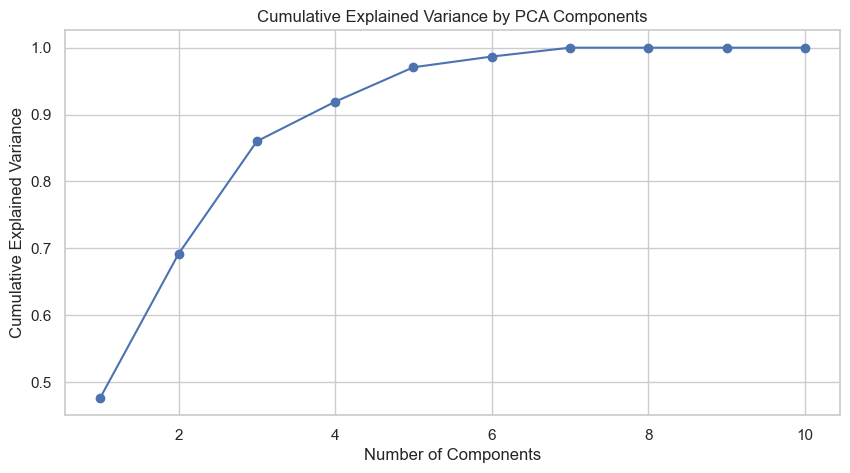

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(features)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [111]:
# === Step 5: PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA columns to the DataFrame
for i in range(2):
    yearly_df.loc[X.index, f'PCA{i+1}'] = X_pca[:, i]

In [119]:
# === Step 6: KMeans Clustering ===
kmeans = KMeans(n_clusters=4, random_state=20)
yearly_df.loc[X.dropna().index, 'cluster'] = kmeans.fit_predict(X_pca)

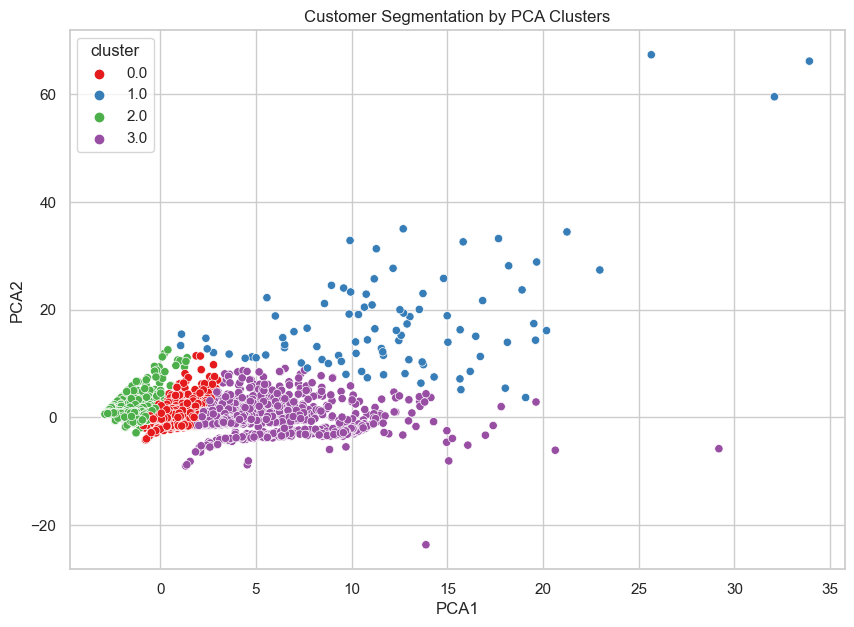

In [120]:
# === Step 7: Visualization ===
plt.figure(figsize=(10, 7))
sns.scatterplot(data=yearly_df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.title('Customer Segmentation by PCA Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


In [127]:
# === Step 8: Cluster Profiling ===
cluster_profile = yearly_df.groupby('cluster')[[
    'yearly_volume', 'yearly_income', 'yearly_number_of_orders',
    'efficiency', 'total_cost'
]].mean().reset_index()

# Add cost-to-income ratio (%)
cluster_profile['cost_income_pct'] = (cluster_profile['total_cost'] / cluster_profile['yearly_income']) * 100

# Compute overall means for comparison
overall_means = yearly_df[[
    'yearly_volume', 'yearly_income', 'yearly_number_of_orders',
    'efficiency', 'total_cost'
]].mean().to_frame().T
overall_means['cluster'] = 'Overall Mean'
overall_means['cost_income_pct'] = (overall_means['total_cost'] / overall_means['yearly_income']) * 100

# Append overall means to cluster profile for comparison
cluster_profile = pd.concat([cluster_profile, overall_means], ignore_index=True)

print("Cluster Profiles with Enrichment:")
print(cluster_profile.to_markdown(index=False))

Cluster Profiles with Enrichment:
| cluster      |   yearly_volume |   yearly_income |   yearly_number_of_orders |   efficiency |   total_cost |   cost_income_pct |
|:-------------|----------------:|----------------:|--------------------------:|-------------:|-------------:|------------------:|
| 0.0          |         4030.02 |         3748.01 |                   29.2773 |     2.68162  |      656.972 |         17.5286   |
| 1.0          |       277042    |       165849    |                   76.3556 |     0.527404 |     1225.56  |          0.738957 |
| 2.0          |         1564.87 |         1172.85 |                   10.4658 |     2.33534  |      249.296 |         21.2556   |
| 3.0          |         8507.91 |         9833.93 |                   49.8324 |     1.21711  |     1205.11  |         12.2546   |
| Overall Mean |         4183.2  |         3877.04 |                   23.8075 |     2.26857  |      554.502 |         14.3022   |


In [122]:
# === Step 9: Save Results to CSV ===
yearly_df.to_csv('customer_segmentation_with_clusters.csv', index=False)
